Практическая работа №4. Визуализация данных, полученных в практической работе №3 

---

Устанавливаем и подключаем модуль geopandas

In [0]:
!pip install geopandas
import geopandas as gpd

     |████████████████████████████████| 921kB 2.8MB/s 
     |████████████████████████████████| 10.1MB 39.0MB/s 
     |████████████████████████████████| 11.8MB 200kB/s 


Выгрузка файла с координатами округов СПб

In [0]:
from google.colab import files
uploaded = files.upload()


Saving admin_level_8_geojson.geojson to admin_level_8_geojson.geojson


In [0]:
%matplotlib inline
mo = gpd.read_file('admin_level_8_geojson.geojson')

Делаем выборку координат для округов Невского района 

In [0]:
nevsky = mo[(mo.name == 'округ № 54') | (mo.name == 'Ивановский округ') | (mo.name == 'Народный округ') | \
       (mo.name == 'округ Невская застава') | (mo.name == 'Невский округ') | (mo.name == 'Обуховский округ') | \
        (mo.name == 'округ Оккервиль') | (mo.name == 'округ Правобережный') | (mo.name == 'округ Рыбацкое')] 
nevsky = nevsky[['name', 'geometry']]
nevsky_win = nevsky
nevsky_nas = nevsky
nevsky

,name,geometry
3792,округ Оккервиль,"MULTIPOLYGON (((30.50292 59.92550, 30.50168 59..."
3793,округ Правобережный,"MULTIPOLYGON (((30.50441 59.93492, 30.50298 59..."
3794,Народный округ,"MULTIPOLYGON (((30.51638 59.86259, 30.50868 59..."
7739,округ Невская застава,"MULTIPOLYGON (((30.44403 59.89344, 30.44072 59..."
7984,Ивановский округ,"MULTIPOLYGON (((30.45286 59.87796, 30.45209 59..."
7985,Обуховский округ,"MULTIPOLYGON (((30.48088 59.85410, 30.47932 59..."
8320,округ Рыбацкое,"MULTIPOLYGON (((30.56730 59.82404, 30.56324 59..."
10745,округ № 54,"MULTIPOLYGON (((30.49893 59.91053, 30.49628 59..."
10746,Невский округ,"MULTIPOLYGON (((30.48267 59.90672, 30.45963 59..."


Сбор данных по статистике избирательных комиссий Невского района

In [0]:
import pandas as pd
import requests

In [0]:
url1 = "http://www.st-petersburg.vybory.izbirkom.ru/region/region/st-petersburg?action=show&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217423&type=222"
url2 = "http://www.st-petersburg.vybory.izbirkom.ru/region/region/st-petersburg?action=show&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217442&type=222"
def parser(url):
  response = requests.get(url)
  uik = pd.read_html(url, encoding='cp1251', header = 0)[7]
  uik.drop([1],inplace = True)
  for i in range(uik.shape[1]): 
    uik.iloc[1,i] = int(uik.iloc[1,i]) + int(uik.iloc[2,i]) 
    for j in range(3):
      uik.iloc[(11+j),i] = (uik.iloc[(11+j),i]).split()[1] 
  uik.drop([int(k) for k in range(3,12)], inplace = True)
  return(uik)
    
uik5 = parser(url1)
uik24 = parser(url2)
uik24.drop(uik24.columns[[61,62,63,64,65,66,67,68,69,70]], axis=1, inplace=True)
print(uik5)
print(uik24)


   УИК №1422 УИК №1423 УИК №1424  ... УИК №1538 УИК №1539 УИК №1540
0       1797      1945      1814  ...      1875      1022      1114
2        484       505       321  ...       574      1006      1096
12    11.78%    11.29%    14.02%  ...    24.56%     6.67%     7.48%
13    69.63%    69.90%    70.09%  ...    39.37%    84.16%    75.00%
14    15.91%    15.25%    14.02%  ...    33.10%     8.86%    15.78%

[5 rows x 119 columns]
   УИК №1545 УИК №1546 УИК №1547  ... УИК №1603 УИК №1604 УИК №1605
0       2041      1916      1855  ...      2271      2223      3026
2        705       484       505  ...       549       558       603
12    22.70%    16.88%    19.88%  ...     5.83%     6.81%     3.98%
13    51.21%    59.17%    69.58%  ...    90.35%    81.36%    81.43%
14    22.55%    21.46%     7.75%  ...     3.83%     9.50%    12.27%

[5 rows x 61 columns]


Подсчет статистики явки по избирательным комиссиям и распределение голосов по кандидатам. Сбор данных по населению округов Невского района.

In [0]:
proc_ap = []
proc_ap1 = []
proc_ap2 = []
nasel = []


for i in range(uik5.shape[1]): 
    proc_ap1.append((int(uik5.iloc[1, i])/(int(uik5.iloc[0,i])))*100)
    nasel.append(int(uik5.iloc[0,i]))


for i in range(uik24.shape[1]):
    proc_ap2.append((int(uik24.iloc[1, i])/(int(uik24.iloc[0,i])))*100)
    nasel.append(int(uik24.iloc[0,i]))

 
proc_ap=proc_ap1+proc_ap2

print(len(proc_ap))

proc_Amosov = []
proc_Beglov = []
proc_Tikhonova = []
ap = []

for i in range(uik5.shape[1]):
    proc_Amosov.append(float(uik5.iloc[2, i].split("%")[0]))
    proc_Beglov.append(float(uik5.iloc[3, i].split("%")[0]))
    proc_Tikhonova.append(float(uik5.iloc[4, i].split("%")[0]))
    ap.append(int(uik5.iloc[0,i]))
    
for i in range(uik24.shape[1]):
    proc_Amosov.append(float(uik24.iloc[2, i].split("%")[0]))
    proc_Beglov.append(float(uik24.iloc[3, i].split("%")[0]))
    proc_Tikhonova.append(float(uik24.iloc[4, i].split("%")[0]))
    ap.append(int(uik24.iloc[0,i]))

180


Разделяем данные района по округам, собираем информацию по населению, победителю и проценту явки в отдельных округах. 


In [0]:
nev_procent_appearence = []
winner_okrug = []
population = []

def po_okrugam(a,b,c,d):
  appearence_okrug = 0
  okrug = 0
  okrug_sum_Amosov=0
  okrug_sum_Beglov=0
  okrug_sum_Tikhonova=0
  okrug_popul=0
  if (d>0):
    for i in range(c,d):
      appearence_okrug += proc_ap[i] 
      okrug += 1
      okrug_popul += nasel[i] 
      if (proc_Amosov[i]>proc_Beglov[i]) & (proc_Amosov[i]>proc_Tikhonova[i]):
        okrug_sum_Amosov += 1
      if (proc_Beglov[i]>proc_Amosov[i]) & (proc_Beglov[i]>proc_Tikhonova[i]):  
        okrug_sum_Beglov += 1
      if (proc_Tikhonova[i]>proc_Beglov[i]) & (proc_Tikhonova[i]>proc_Amosov[i]):  
        okrug_sum_Tikhonova += 1
  for i in range(a,b):
    appearence_okrug += proc_ap[i] 
    okrug += 1
    okrug_popul += nasel[i] 
    if (proc_Amosov[i]>proc_Beglov[i]) & (proc_Amosov[i]>proc_Tikhonova[i]):
      okrug_sum_Amosov += 1
    if (proc_Beglov[i]>proc_Amosov[i]) & (proc_Beglov[i]>proc_Tikhonova[i]):  
      okrug_sum_Beglov += 1
    if (proc_Tikhonova[i]>proc_Beglov[i]) & (proc_Tikhonova[i]>proc_Amosov[i]):  
      okrug_sum_Tikhonova += 1
  if (okrug_sum_Amosov > okrug_sum_Beglov) & (okrug_sum_Amosov > okrug_sum_Tikhonova):
    winner_okrug.append('Амосов')
  if (okrug_sum_Beglov > okrug_sum_Amosov) & (okrug_sum_Beglov > okrug_sum_Tikhonova):
    winner_okrug.append('Беглов')
  if (okrug_sum_Tikhonova > okrug_sum_Beglov) & (okrug_sum_Tikhonova > okrug_sum_Amosov):
    winner_okrug.append('Тихонова') 
  population.append(okrug_popul)  
  nev_procent_appearence.append(int(appearence_okrug / okrug))


     
po_okrugam(66,86,0,0)     
po_okrugam(86,111,113,115) 
po_okrugam(0,21,111,113) 
po_okrugam(119,131,0,0) 
po_okrugam(131,143,0,0)  
po_okrugam(143,160,0,0) 
po_okrugam(160,180,0,0)    
po_okrugam(21,44,0,0)
po_okrugam(44,66,115,119)      
print(nev_procent_appearence)
print(winner_okrug)
print(population)  

[27, 29, 24, 27, 26, 24, 25, 25, 30]
['Беглов', 'Беглов', 'Беглов', 'Беглов', 'Беглов', 'Беглов', 'Беглов', 'Беглов', 'Беглов']
[42600, 61793, 48779, 21455, 20396, 35243, 46261, 47501, 54741]


# Визуализация округов Невского района на карте


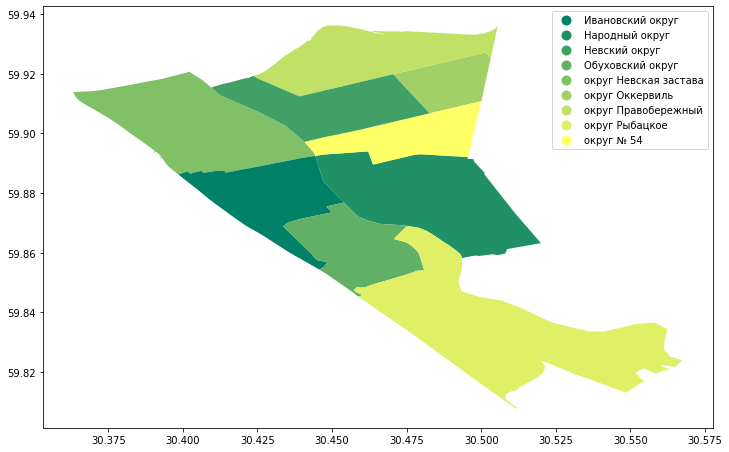

In [0]:
nevsky_map = gpd.GeoDataFrame(nevsky)
nevsky_map.plot(column = 'name',  cmap='summer', legend=True, figsize=[12,12])

Составляем таблицу с данными о количестве населения в округах, визуализируем на карте.

In [0]:
ind1 = ['3792', '3793', '3794', '7739', '7984', '7985', '8320', '10745', '10746']
nevsky_ = pd.DataFrame(data={'Население' :population}, index = ind1)
nevsky_nas = pd.merge(nevsky_nas, nevsky_, on=nevsky_nas.index, how='inner')
nevsky_nas

,key_0,name,geometry,Население
0,3792,округ Оккервиль,"MULTIPOLYGON (((30.50292 59.92550, 30.50168 59...",42600
1,3793,округ Правобережный,"MULTIPOLYGON (((30.50441 59.93492, 30.50298 59...",61793
2,3794,Народный округ,"MULTIPOLYGON (((30.51638 59.86259, 30.50868 59...",48779
3,7739,округ Невская застава,"MULTIPOLYGON (((30.44403 59.89344, 30.44072 59...",21455
4,7984,Ивановский округ,"MULTIPOLYGON (((30.45286 59.87796, 30.45209 59...",20396
5,7985,Обуховский округ,"MULTIPOLYGON (((30.48088 59.85410, 30.47932 59...",35243
6,8320,округ Рыбацкое,"MULTIPOLYGON (((30.56730 59.82404, 30.56324 59...",46261
7,10745,округ № 54,"MULTIPOLYGON (((30.49893 59.91053, 30.49628 59...",47501
8,10746,Невский округ,"MULTIPOLYGON (((30.48267 59.90672, 30.45963 59...",54741


# Визуализация количества населения в округах Невского района 

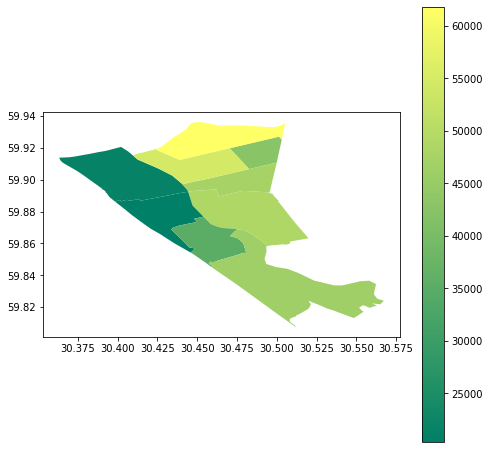

In [0]:
nevsky_nas_map = gpd.GeoDataFrame(nevsky_nas)
nevsky_nas_map.plot(column = 'Население',  cmap='summer', legend=True, figsize=[8,8])

Собираем в таблицу данные о победителе в каждом округе, визуализируем на карте.

In [0]:
ind = ['3792', '3793', '3794', '7739', '7984', '7985', '8320', '10745', '10746']
nevsky1 = pd.DataFrame(data={'Победитель по округу' :winner_okrug}, index = ind)
nevsky_win = pd.merge(nevsky_win, nevsky1, on=nevsky_win.index, how='inner')
nevsky_win

,key_0,name,geometry,Победитель по округу
0,3792,округ Оккервиль,"MULTIPOLYGON (((30.50292 59.92550, 30.50168 59...",Беглов
1,3793,округ Правобережный,"MULTIPOLYGON (((30.50441 59.93492, 30.50298 59...",Беглов
2,3794,Народный округ,"MULTIPOLYGON (((30.51638 59.86259, 30.50868 59...",Беглов
3,7739,округ Невская застава,"MULTIPOLYGON (((30.44403 59.89344, 30.44072 59...",Беглов
4,7984,Ивановский округ,"MULTIPOLYGON (((30.45286 59.87796, 30.45209 59...",Беглов
5,7985,Обуховский округ,"MULTIPOLYGON (((30.48088 59.85410, 30.47932 59...",Беглов
6,8320,округ Рыбацкое,"MULTIPOLYGON (((30.56730 59.82404, 30.56324 59...",Беглов
7,10745,округ № 54,"MULTIPOLYGON (((30.49893 59.91053, 30.49628 59...",Беглов
8,10746,Невский округ,"MULTIPOLYGON (((30.48267 59.90672, 30.45963 59...",Беглов


# Визуализация победителя в округах Невского района на карте

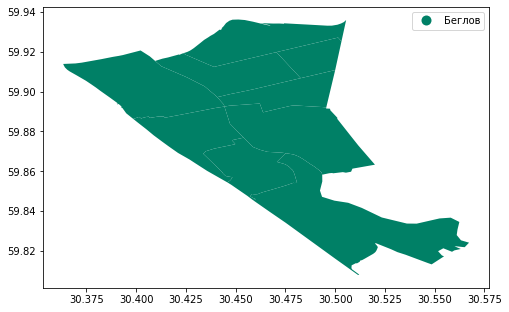

In [0]:
nevsky_win_map = gpd.GeoDataFrame(nevsky_win)
nevsky_win_map.plot(column = 'Победитель по округу',  cmap='summer', legend=True, figsize=[8,8])


Соберем таблицу с данными о явке в каждом округе, визуализируем процент явки в каждом округе на карте.

In [0]:
ind2 = ['3792', '3793', '3794', '7739', '7984', '7985', '8320', '10745', '10746']
nev2 = pd.DataFrame(data={'Явка, %' :nev_procent_appearence}, index = ind2)
nevsky = pd.merge(nevsky, nev2, on=nevsky.index, how='inner')
nevsky

,key_0,name,geometry,"Явка, %"
0,3792,округ Оккервиль,"MULTIPOLYGON (((30.50292 59.92550, 30.50168 59...",27
1,3793,округ Правобережный,"MULTIPOLYGON (((30.50441 59.93492, 30.50298 59...",29
2,3794,Народный округ,"MULTIPOLYGON (((30.51638 59.86259, 30.50868 59...",24
3,7739,округ Невская застава,"MULTIPOLYGON (((30.44403 59.89344, 30.44072 59...",27
4,7984,Ивановский округ,"MULTIPOLYGON (((30.45286 59.87796, 30.45209 59...",26
5,7985,Обуховский округ,"MULTIPOLYGON (((30.48088 59.85410, 30.47932 59...",24
6,8320,округ Рыбацкое,"MULTIPOLYGON (((30.56730 59.82404, 30.56324 59...",25
7,10745,округ № 54,"MULTIPOLYGON (((30.49893 59.91053, 30.49628 59...",25
8,10746,Невский округ,"MULTIPOLYGON (((30.48267 59.90672, 30.45963 59...",30


# Визуализация процента явки избирателей в округах Невского района на карте:

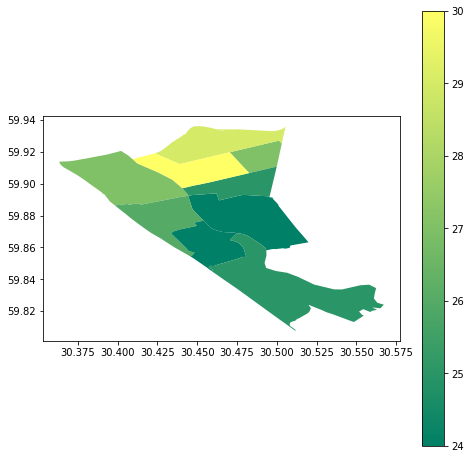

In [0]:
nevsky_map1 = gpd.GeoDataFrame(nevsky)
nevsky_map1.plot(column = 'Явка, %',  cmap='summer', legend=True, figsize=[8,8])